In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('players_22.csv', low_memory=False)

#Show me the columns
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential',
        'club_name', 'value_eur', 'wage_eur','player_positions']]

In [5]:

#Give me the first position to indicate the most preferred player position
df['player_positions'] = df['player_positions'].str.split(',', expand = True)[0]

In [7]:
#Dropping the null and nan values
df.dropna(inplace=True)

In [26]:
#Removed all the players that are not at the world cup due to injury

players_missing_worldcup = ['K. Benzema', 'S. Mané', 'S. Agüero', 'Sergio Ramos', 'P. Pogba',
                            'M. Reus', 'R. James' 'Diogo Jota', 'A. Harit', 'N. Kanté', 'G. Lo Celso', 'Piqué']

# dropping injured players
drop_index = df[df['short_name'].isin(players_missing_worldcup)].index
df.drop(drop_index, axis=0, inplace=True)


In [123]:
#Give me all the participating teams
teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia'
]

# filtering only national teams in the world cup
df = df[df['nationality_name'].isin(teams_worldcup)]

In [28]:
# Collect the best players
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)


### Range of players by over all rating

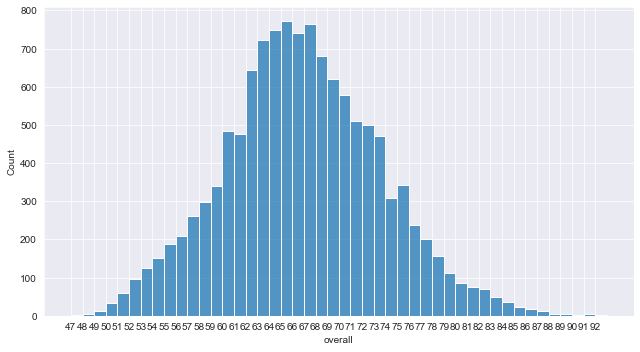

In [24]:
import numpy as np
fig, ax = plt.subplots(figsize=(9, 5), tight_layout=True)

sns.histplot(df, x='overall', binwidth=1)

bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

In [30]:
#Remove duplicate entry of players from the df
df.drop_duplicates('player_positions')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,CDM
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,150000.0,RM


In [31]:
df

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
6,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
...,...,...,...,...,...,...,...,...,...
19183,F. Emmings,17,United States,48,73,Minnesota United FC,130000.0,500.0,GK
19197,J. Neal,17,United States,48,69,LA Galaxy,140000.0,500.0,CB
19216,H. Wiles-Richards,19,England,48,65,Bristol City,110000.0,1000.0,GK
19217,J. Affonso,23,Uruguay,48,55,Cerro Largo Fútbol Club,90000.0,500.0,CM


### The Most "Skilled" players on each Nation

In [43]:
df_best_players = df.copy()
df_best_players = df_best_players.drop_duplicates('nationality_name').reset_index(drop=True)
country_short =  df_best_players['nationality_name'].str.extract('(^\w{3})', expand=False).str.upper()
df_best_players['name_nationality'] = df_best_players['short_name'] +' (' + country_short + ')'

In [44]:
df_best_players

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions,name_nationality
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW,L. Messi (ARG)
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST,R. Lewandowski (POL)
2,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,ST,K. Mbappé (FRA)
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW,Neymar Jr (BRA)
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM,K. De Bruyne (BEL)
5,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,ST,Cristiano Ronaldo (POR)
6,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK,M. ter Stegen (GER)
7,H. Kane,27,England,90,90,Tottenham Hotspur,129500000.0,240000.0,ST,H. Kane (ENG)
8,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB,V. van Dijk (NET)
9,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44500000.0,135000.0,ST,L. Suárez (URU)


### Best Squad Per Teams

In [85]:
def best_squad(nationality):
    df_best_squad = df.copy()
    df_best_squad = df_best_squad.groupby(['nationality_name', 'player_positions']).head(2)
    df_best_squad = df_best_squad[df_best_squad['nationality_name']==nationality].sort_values(['overall', 'player_positions', 'potential'], ascending=False)
    return df_best_squad


In [124]:
df['nationality_name'].unique()

array(['Argentina', 'Poland', 'France', 'Brazil', 'Belgium', 'Portugal',
       'Germany', 'England', 'Netherlands', 'Uruguay', 'Costa Rica',
       'Croatia', 'Spain', 'Senegal', 'Morocco', 'Serbia', 'Switzerland',
       'Denmark', 'Ghana', 'Mexico', 'Cameroon', 'Canada',
       'United States', 'Wales', 'Ecuador', 'Japan', 'Iran', 'Tunisia',
       'Australia', 'Saudi Arabia'], dtype=object)

In [125]:
best_squad('Qatar')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions


In [87]:
best_squad('Brazil')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
18,Ederson,27,Brazil,89,91,Manchester City,94000000.0,200000.0,GK
20,Alisson,28,Brazil,89,90,Liverpool,82000000.0,190000.0,GK
14,Casemiro,29,Brazil,89,89,Real Madrid CF,88000000.0,310000.0,CDM
39,Marquinhos,27,Brazil,87,90,Paris Saint-Germain,90500000.0,135000.0,CB
61,Fabinho,27,Brazil,86,88,Liverpool,73500000.0,165000.0,CDM
85,Roberto Firmino,29,Brazil,85,85,Liverpool,54000000.0,185000.0,CF
71,Thiago Silva,36,Brazil,85,85,Chelsea,9500000.0,105000.0,CB
191,Gabriel Jesus,24,Brazil,83,87,Manchester City,52500000.0,150000.0,ST
153,Alex Sandro,30,Brazil,83,83,Juventus,31500000.0,95000.0,LB


In [88]:
best_squad('Belgium')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
12,T. Courtois,29,Belgium,89,91,Real Madrid CF,85500000.0,250000.0,GK
25,R. Lukaku,28,Belgium,88,88,Chelsea,93500000.0,260000.0,ST
54,K. Casteels,29,Belgium,86,87,VfL Wolfsburg,52000000.0,88000.0,GK
75,E. Hazard,30,Belgium,85,85,Real Madrid CF,52000000.0,240000.0,LW
121,Y. Carrasco,27,Belgium,84,84,Atlético de Madrid,45000000.0,81000.0,LM
129,Y. Tielemans,24,Belgium,84,87,Leicester City,57000000.0,125000.0,CM
100,D. Mertens,34,Belgium,84,84,Napoli,20500000.0,105000.0,CF
142,A. Witsel,32,Belgium,83,83,Borussia Dortmund,24000000.0,72000.0,CDM
231,T. Hazard,28,Belgium,82,82,Borussia Dortmund,30500000.0,75000.0,LM


In [89]:
best_squad('France')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
6,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,ST
31,H. Lloris,34,France,87,87,Tottenham Hotspur,13500000.0,125000.0,GK
64,K. Coman,25,France,86,87,FC Bayern München,81000000.0,120000.0,LM
57,R. Varane,28,France,86,88,Manchester United,68500000.0,180000.0,CB
83,A. Griezmann,30,France,85,85,Atlético de Madrid,53000000.0,220000.0,ST
137,T. Hernández,23,France,84,90,AC Milan,62500000.0,51000.0,LB
111,L. Digne,27,France,84,84,Everton,40500000.0,110000.0,LB
127,M. Maignan,25,France,84,89,AC Milan,49500000.0,45000.0,GK
131,N. Fekir,27,France,84,84,Real Betis Balompié,45000000.0,42000.0,CAM
192,O. Dembélé,24,France,83,88,FC Barcelona,55000000.0,165000.0,RW


In [90]:
best_squad('Argentina')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
33,Á. Di María,33,Argentina,87,87,Paris Saint-Germain,49500000.0,160000.0,RW
41,P. Dybala,27,Argentina,87,88,Juventus,93000000.0,160000.0,CF
93,L. Martínez,23,Argentina,85,89,Inter,78000000.0,145000.0,ST
69,A. Gómez,33,Argentina,85,85,Sevilla FC,33500000.0,51000.0,CAM
134,M. Acuña,29,Argentina,84,84,Sevilla FC,37000000.0,45000.0,LB
113,E. Martínez,28,Argentina,84,85,Aston Villa,33500000.0,81000.0,GK
177,Á. Correa,26,Argentina,83,86,Atlético de Madrid,48000000.0,80000.0,ST
171,L. Ocampos,26,Argentina,83,83,Sevilla FC,39500000.0,46000.0,LW
242,N. Tagliafico,28,Argentina,82,82,Ajax,27500000.0,24000.0,LB


In [91]:
best_squad('England')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
9,H. Kane,27,England,90,90,Tottenham Hotspur,129500000.0,240000.0,ST
27,R. Sterling,26,England,88,89,Manchester City,107500000.0,290000.0,LW
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,150000.0,RM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB
60,J. Vardy,34,England,86,86,Leicester City,33000000.0,180000.0,ST
80,K. Walker,31,England,85,85,Manchester City,39000000.0,170000.0,RB
94,M. Rashford,23,England,85,89,Manchester United,77500000.0,150000.0,LM
118,J. Grealish,25,England,84,85,Manchester City,50500000.0,180000.0,LW
117,L. Shaw,25,England,84,86,Manchester United,48500000.0,140000.0,LB
102,J. Henderson,31,England,84,84,Liverpool,29500000.0,140000.0,CDM


In [92]:
best_squad('Spain')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
59,Gerard Moreno,29,Spain,86,86,Villarreal CF,68000000.0,73000.0,ST
50,Jordi Alba,32,Spain,86,86,FC Barcelona,47000000.0,200000.0,LB
66,Marcos Llorente,26,Spain,86,89,Atlético de Madrid,88000000.0,95000.0,CM
51,Thiago,30,Spain,86,86,Liverpool,65000000.0,180000.0,CM
67,Rodri,25,Spain,86,89,Manchester City,81000000.0,175000.0,CDM
52,Sergio Busquets,32,Spain,86,86,FC Barcelona,45000000.0,200000.0,CDM
63,A. Laporte,27,Spain,86,89,Manchester City,77000000.0,185000.0,CB
87,Carvajal,29,Spain,85,85,Real Madrid CF,47500000.0,210000.0,RB
92,Oyarzabal,24,Spain,85,89,Real Sociedad,77500000.0,57000.0,LW
72,David Silva,35,Spain,85,85,Real Sociedad,22000000.0,44000.0,CAM


In [93]:
best_squad('Portugal')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,ST
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
46,Rúben Dias,24,Portugal,87,91,Manchester City,102500000.0,170000.0,CB
62,João Cancelo,27,Portugal,86,87,Manchester City,71500000.0,185000.0,RB
65,Bernardo Silva,26,Portugal,86,87,Manchester City,80000000.0,200000.0,CAM
135,André Silva,25,Portugal,84,85,RB Leipzig,51000000.0,110000.0,ST
125,Ricardo Pereira,27,Portugal,84,84,Leicester City,40500000.0,130000.0,RB
124,R. Guerreiro,27,Portugal,84,84,Borussia Dortmund,40500000.0,79000.0,LB
198,João Félix,21,Portugal,83,91,Atlético de Madrid,82000000.0,61000.0,CF
248,Rafa,28,Portugal,82,82,SL Benfica,30500000.0,22000.0,RM


In [94]:
best_squad('Mexico')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
168,R. Jiménez,30,Mexico,83,83,Wolverhampton Wanderers,35500000.0,120000.0,ST
141,C. Vela,32,Mexico,83,83,Los Angeles FC,29000000.0,17000.0,RW
217,J. Corona,28,Mexico,82,82,FC Porto,30500000.0,22000.0,RM
355,H. Lozano,25,Mexico,81,82,Napoli,31000000.0,77000.0,RW
288,H. Herrera,31,Mexico,81,81,Atlético de Madrid,21000000.0,63000.0,CM
389,G. Ochoa,35,Mexico,80,80,Club América,2300000.0,27000.0,GK
684,J. Hernández,33,Mexico,78,78,LA Galaxy,9000000.0,12000.0,ST
705,L. Rodríguez,30,Mexico,78,78,Tigres U.A.N.L.,12000000.0,44000.0,RB
666,A. Talavera,38,Mexico,78,78,Club Universidad Nacional,1600000.0,8000.0,GK
672,A. Guardado,34,Mexico,78,78,Real Betis Balompié,4800000.0,24000.0,CDM


In [95]:
best_squad('Netherlands')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
43,F. de Jong,24,Netherlands,87,92,FC Barcelona,119500000.0,210000.0,CM
86,M. Depay,27,Netherlands,85,86,FC Barcelona,63000000.0,220000.0,CF
96,M. de Ligt,21,Netherlands,85,90,Juventus,75000000.0,81000.0,CB
101,G. Wijnaldum,30,Netherlands,84,84,Paris Saint-Germain,40500000.0,115000.0,CM
183,W. Weghorst,28,Netherlands,83,83,VfL Wolfsburg,37000000.0,95000.0,ST
270,D. Dumfries,25,Netherlands,82,84,Inter,35000000.0,100000.0,RB
237,M. de Roon,30,Netherlands,82,82,Atalanta,25500000.0,59000.0,CDM
351,H. Hateboer,27,Netherlands,81,81,Atalanta,25000000.0,55000.0,RWB
314,S. Berghuis,29,Netherlands,81,81,Ajax,25500000.0,26000.0,RW


In [96]:
best_squad('Denmark')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
70,K. Schmeichel,34,Denmark,85,85,Leicester City,9000000.0,115000.0,GK
176,P. Højbjerg,25,Denmark,83,86,Tottenham Hotspur,43500000.0,105000.0,CDM
144,S. Kjær,32,Denmark,83,83,AC Milan,23500000.0,54000.0,CB
213,C. Eriksen,29,Denmark,82,82,Inter,29500000.0,120000.0,CM
303,T. Delaney,29,Denmark,81,81,Sevilla FC,22000000.0,34000.0,CDM
395,D. Wass,32,Denmark,80,80,Valencia CF,14500000.0,38000.0,RB
452,A. Christensen,25,Denmark,80,85,Chelsea,28000000.0,95000.0,CB
624,K. Dolberg,23,Denmark,79,83,OGC Nice,25500000.0,37000.0,ST
952,Y. Poulsen,27,Denmark,77,78,RB Leipzig,12500000.0,68000.0,ST
1072,J. Mæhle,24,Denmark,77,82,Atalanta,15000000.0,35000.0,RWB


In [97]:
best_squad('Germany')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
7,M. Neuer,35,Germany,90,90,FC Bayern München,13500000.0,86000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,CDM
24,T. Kroos,31,Germany,88,88,Real Madrid CF,75000000.0,310000.0,CM
40,L. Goretzka,26,Germany,87,88,FC Bayern München,93000000.0,140000.0,CM
35,T. Müller,31,Germany,87,87,FC Bayern München,66000000.0,140000.0,CAM
49,M. Hummels,32,Germany,86,86,Borussia Dortmund,44000000.0,95000.0,CB
89,S. Gnabry,25,Germany,85,86,FC Bayern München,64500000.0,110000.0,RM
126,T. Werner,25,Germany,84,87,Chelsea,56500000.0,155000.0,ST
132,L. Sané,25,Germany,84,87,FC Bayern München,56000000.0,105000.0,RM


In [98]:
best_squad('Uruguay')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
23,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44500000.0,135000.0,ST
74,E. Cavani,34,Uruguay,85,85,Manchester United,26000000.0,190000.0,ST
130,J. Giménez,26,Uruguay,84,88,Atlético de Madrid,52000000.0,74000.0,CB
196,F. Valverde,22,Uruguay,83,89,Real Madrid CF,58000000.0,160000.0,CM
159,S. Coates,30,Uruguay,83,83,Sporting CP,30000000.0,21000.0,CB
403,F. Muslera,35,Uruguay,80,80,Galatasaray SK,2300000.0,32000.0,GK
468,L. Torreira,25,Uruguay,80,84,Fiorentina,26500000.0,77000.0,CDM
415,N. Lodeiro,32,Uruguay,80,80,Seattle Sounders FC,16500000.0,12000.0,CAM
633,M. Arambarri,25,Uruguay,79,84,Getafe CF,23500000.0,29000.0,CDM
731,D. Suárez,33,Uruguay,78,78,Getafe CF,7500000.0,28000.0,RB


In [99]:
best_squad('Switzerland')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
73,Y. Sommer,32,Switzerland,85,85,Borussia Mönchengladbach,26500000.0,40000.0,GK
409,R. Bürki,30,Switzerland,80,80,Borussia Dortmund,14000000.0,46000.0,GK
428,R. Freuler,29,Switzerland,80,80,Atalanta,20500000.0,58000.0,CM
480,D. Zakaria,24,Switzerland,80,86,Borussia Mönchengladbach,30500000.0,28000.0,CDM
479,M. Akanji,25,Switzerland,80,83,Borussia Dortmund,25000000.0,54000.0,CB
543,X. Shaqiri,29,Switzerland,79,79,Olympique Lyonnais,17000000.0,75000.0,RW
583,K. Mbabu,26,Switzerland,79,82,VfL Wolfsburg,21000000.0,59000.0,RB
552,G. Xhaka,28,Switzerland,79,79,Arsenal,15500000.0,80000.0,CDM
605,N. Elvedi,24,Switzerland,79,83,Borussia Mönchengladbach,22500000.0,26000.0,CB
710,H. Seferović,29,Switzerland,78,78,SL Benfica,14000000.0,18000.0,ST


In [100]:
best_squad('United States')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
259,C. Pulisic,22,United States,82,88,Chelsea,49000000.0,120000.0,LW
732,J. Brooks,28,United States,78,79,VfL Wolfsburg,13500000.0,56000.0,CB
1075,Z. Steffen,26,United States,77,82,Manchester City,12000000.0,73000.0,GK
1095,W. McKennie,22,United States,77,82,Juventus,16000000.0,57000.0,CM
1066,T. Adams,22,United States,77,83,RB Leipzig,15500000.0,49000.0,CDM
1122,G. Reyna,18,United States,77,87,Borussia Dortmund,22000000.0,18000.0,CAM
1458,S. Dest,20,United States,76,85,FC Barcelona,15500000.0,67000.0,RB
1862,M. Turner,27,United States,75,77,New England Revolution,5000000.0,7000.0,GK
1799,C. Roldan,26,United States,75,78,Seattle Sounders FC,6500000.0,8000.0,CDM
1754,A. Long,28,United States,75,77,New York Red Bulls,5500000.0,9000.0,CB


In [101]:
best_squad('Croatia')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
32,L. Modrić,35,Croatia,87,87,Real Madrid CF,32000000.0,190000.0,CM
128,M. Brozović,28,Croatia,84,84,Inter,37000000.0,130000.0,CDM
179,A. Kramarić,30,Croatia,83,83,TSG Hoffenheim,35500000.0,59000.0,ST
172,M. Kovačić,27,Croatia,83,84,Chelsea,41500000.0,135000.0,CM
250,A. Rebić,27,Croatia,82,82,AC Milan,32500000.0,54000.0,LM
282,D. Livaković,26,Croatia,82,87,Dinamo Zagreb,35000000.0,1000.0,GK
296,I. Perišić,32,Croatia,81,81,Inter,20500000.0,105000.0,LM
431,Š. Vrsaljko,29,Croatia,80,80,Atlético de Madrid,18500000.0,56000.0,RB
504,N. Vlašić,23,Croatia,80,86,West Ham United,33500000.0,66000.0,CAM
696,A. Budimir,29,Croatia,78,78,CA Osasuna,14000000.0,34000.0,ST


In [102]:
best_squad('Senegal')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
56,K. Koulibaly,30,Senegal,86,86,Napoli,55500000.0,105000.0,CB
194,É. Mendy,29,Senegal,83,85,Chelsea,30000000.0,105000.0,GK
219,I. Gueye,31,Senegal,82,82,Paris Saint-Germain,21500000.0,88000.0,CDM
828,I. Sarr,23,Senegal,78,86,Watford,31000000.0,53000.0,RW
685,P. Diop,35,Senegal,78,78,UD Ibiza,4000000.0,7000.0,CDM
794,A. Diallo,25,Senegal,78,82,Paris Saint-Germain,17500000.0,62000.0,CB
1125,B. Dia,24,Senegal,77,83,Villarreal CF,17000000.0,30000.0,ST
1231,M. Niang,26,Senegal,76,79,Stade Rennais FC,10000000.0,44000.0,ST
1417,K. Diatta,22,Senegal,76,83,AS Monaco,15000000.0,38000.0,RM
1307,Y. Sabaly,28,Senegal,76,76,Real Betis Balompié,7000000.0,22000.0,RB


In [103]:
best_squad('Iran')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
654,M. Taremi,28,Iran,79,79,FC Porto,18000000.0,19000.0,ST
2051,K. Ansarifard,31,Iran,74,74,AEK Athens,3600000.0,1000.0,ST
2383,A. Gholizadeh,25,Iran,74,76,Royal Charleroi S.C.,5500000.0,13000.0,LM
2731,A. Jahanbakhsh,27,Iran,73,73,Feyenoord,3200000.0,10000.0,RW
2973,A. Abedzadeh,28,Iran,73,74,SD Ponferradina,2400000.0,6000.0,GK
3218,E. Haji Safi,31,Iran,72,72,AEK Athens,1700000.0,900.0,LB
4500,S. Moharrami,25,Iran,71,74,Dinamo Zagreb,2300000.0,550.0,RB
5260,A. Beiranvand,28,Iran,70,72,Boavista FC,1400000.0,9000.0,GK
5108,S. Ghoddos,27,Iran,70,70,Brentford,1700000.0,24000.0,CAM
5932,M. Pouraliganji,29,Iran,69,69,Shenzhen FC,1200000.0,6000.0,CB


In [104]:
best_squad('Japan')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
634,D. Kamada,24,Japan,79,82,Eintracht Frankfurt,24000000.0,29000.0,CAM
824,W. Endo,28,Japan,78,79,VfB Stuttgart,13500000.0,29000.0,CDM
1065,J. Ito,28,Japan,77,77,KRC Genk,10500000.0,21000.0,RW
1064,S. Nakajima,26,Japan,77,77,Portimonense SC,11500000.0,15000.0,LM
883,M. Hasebe,37,Japan,77,77,Eintracht Frankfurt,2100000.0,19000.0,CDM
1388,R. Doan,23,Japan,76,82,PSV,12000000.0,15000.0,RM
1797,T. Minamino,26,Japan,75,76,Liverpool,6500000.0,84000.0,RW
1896,T. Kubo,20,Japan,75,88,RCD Mallorca,13500000.0,77000.0,RM
1649,H. Sakai,31,Japan,75,75,Urawa Red Diamonds,4100000.0,12000.0,RB
1626,T. Inui,33,Japan,75,75,Cerezo Osaka,3500000.0,10000.0,LM


In [105]:
best_squad('Morocco')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
95,A. Hakimi,22,Morocco,85,88,Paris Saint-Germain,69500000.0,100000.0,RB
123,H. Ziyech,28,Morocco,84,84,Chelsea,42500000.0,170000.0,RW
276,Y. En-Nesyri,24,Morocco,82,86,Sevilla FC,44000000.0,37000.0,ST
238,Y. Bounou,30,Morocco,82,82,Sevilla FC,20500000.0,29000.0,GK
494,N. Mazraoui,23,Morocco,80,85,Ajax,29500000.0,17000.0,RB
439,Z. Feddal,31,Morocco,80,80,Sporting CP,14500000.0,17000.0,CB
399,M. Benatia,34,Morocco,80,80,Fatih Karagümrük S.K.,7000000.0,19000.0,CB
544,Y. El Arabi,34,Morocco,79,79,Olympiacos CFP,8500000.0,2000.0,ST
601,Munir,25,Morocco,79,80,Sevilla FC,21000000.0,33000.0,LW
879,A. Taarabt,32,Morocco,77,77,SL Benfica,8500000.0,15000.0,CM


In [106]:
best_squad('Serbia')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
90,S. Milinković-Savić,26,Serbia,85,87,Lazio,66000000.0,100000.0,CM
109,D. Tadić,32,Serbia,84,84,Ajax,33500000.0,32000.0,LW
122,F. Kostić,28,Serbia,84,84,Eintracht Frankfurt,42500000.0,52000.0,LM
476,M. Dmitrović,29,Serbia,80,81,Sevilla FC,16000000.0,26000.0,GK
631,L. Jović,23,Serbia,79,84,Real Madrid CF,27000000.0,130000.0,ST
650,N. Maksimović,26,Serbia,79,84,Getafe CF,23000000.0,30000.0,CDM
542,N. Gudelj,29,Serbia,79,79,Sevilla FC,15000000.0,30000.0,CDM
856,D. Vlahović,21,Serbia,78,85,Fiorentina,29000000.0,43000.0,ST
691,A. Kolarov,35,Serbia,78,78,Inter,4300000.0,55000.0,LB
843,P. Rajković,25,Serbia,78,83,Stade de Reims,16500000.0,20000.0,GK


In [107]:
best_squad('Poland')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
34,W. Szczęsny,31,Poland,87,87,Juventus,42000000.0,105000.0,GK
201,Ł. Fabiański,36,Poland,82,82,West Ham United,3400000.0,43000.0,GK
326,A. Milik,27,Poland,81,82,Olympique de Marseille,30000000.0,81000.0,ST
339,P. Zieliński,27,Poland,81,82,Napoli,29500000.0,74000.0,CM
1318,J. Bednarek,25,Poland,76,82,Southampton,10500000.0,42000.0,CB
1656,T. Kędziora,27,Poland,75,76,Dynamo Kyiv,6000000.0,900.0,RB
1528,M. Rybus,31,Poland,75,75,FC Lokomotiv Moscow,4100000.0,38000.0,LB
1566,M. Klich,31,Poland,75,75,Leeds United,4600000.0,63000.0,CM
1682,P. Dawidowicz,26,Poland,75,78,Hellas Verona,6500000.0,23000.0,CB


In [108]:
best_squad('South Korea')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions


In [109]:
best_squad('Tunisia')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
1017,E. Skhiri,26,Tunisia,77,79,1. FC Köln,11500000.0,26000.0,CDM
1199,W. Khazri,30,Tunisia,76,76,AS Saint-Étienne,7500000.0,33000.0,ST
1627,N. Sliti,28,Tunisia,75,75,Ettifaq FC,5500000.0,29000.0,LM
1877,D. Bronn,26,Tunisia,75,78,FC Metz,6500000.0,17000.0,CB
3286,Y. Touzghar,34,Tunisia,72,72,ESTAC Troyes,1100000.0,15000.0,ST
3319,J. Dudziak,25,Tunisia,72,75,SpVgg Greuther Fürth,3100000.0,17000.0,CAM
3735,S. Bguir,27,Tunisia,72,73,Abha Club,2700000.0,11000.0,CAM
5400,A. Abdi,27,Tunisia,70,71,Stade Malherbe Caen,1700000.0,4000.0,RB
6182,M. Dräger,25,Tunisia,69,74,Nottingham Forest,1900000.0,19000.0,RB
6186,A. Layouni,28,Tunisia,69,69,Vålerenga Fotball,1400000.0,3000.0,LW


In [110]:
best_squad('Cameroon')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
158,J. Matip,29,Cameroon,83,83,Liverpool,30500000.0,130000.0,CB
747,J. Nsame,28,Cameroon,78,78,BSC Young Boys,14500000.0,23000.0,ST
788,K. Toko Ekambi,28,Cameroon,78,78,Olympique Lyonnais,14000000.0,68000.0,LW
923,V. Aboubakar,29,Cameroon,77,77,Al Nassr,10500000.0,44000.0,ST
1353,A. Zambo Anguissa,25,Cameroon,76,80,Napoli,10500000.0,49000.0,CM
1564,A. Nyom,33,Cameroon,75,75,Getafe CF,3500000.0,25000.0,RM
1870,Y. Eteki,23,Cameroon,75,83,Granada CF,12000000.0,17000.0,CDM
1895,Y. Neyou,24,Cameroon,75,80,AS Saint-Étienne,8000000.0,23000.0,CDM
1806,H. Moukoudi,23,Cameroon,75,80,AS Saint-Étienne,7500000.0,23000.0,CB
2327,N. Moumi Ngamaleu,26,Cameroon,74,74,BSC Young Boys,4600000.0,16000.0,LM


In [111]:
best_squad('Canada')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
274,A. Davies,20,Canada,82,89,FC Bayern München,57000000.0,59000.0,LB
848,J. David,21,Canada,78,86,LOSC Lille,32000000.0,31000.0,ST
1433,Stephen Eustáquio,24,Canada,76,82,FC Paços de Ferreira,11000000.0,9000.0,CDM
1138,A. Hutchinson,38,Canada,76,76,Beşiktaş JK,1500000.0,26000.0,CDM
1798,C. Larin,26,Canada,75,76,Beşiktaş JK,6500000.0,41000.0,ST
2695,M. Crépeau,27,Canada,73,76,Vancouver Whitecaps FC,3000000.0,6000.0,GK
2473,S. Arfield,32,Canada,73,73,Rangers FC,2400000.0,39000.0,CM
3175,J. Hoilett,31,Canada,72,72,Reading,1900000.0,21000.0,LM
3379,J. Osorio,29,Canada,72,72,Toronto FC,2300000.0,7000.0,CM
4328,R. Laryea,26,Canada,71,73,Toronto FC,2100000.0,5000.0,RB


In [112]:
best_squad('Ecuador')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
648,P. Estupiñán,23,Ecuador,79,85,Villarreal CF,26000000.0,29000.0,LB
785,Á. Mena,33,Ecuador,78,78,Club León,9000000.0,28000.0,RM
677,F. Caicedo,32,Ecuador,78,78,Genoa,11500000.0,22000.0,CF
1185,D. Díaz,35,Ecuador,76,76,Barcelona Sporting Club,3100000.0,1000.0,CAM
1559,F. Martínez,31,Ecuador,75,75,Club Tijuana,4800000.0,23000.0,ST
1733,E. Valencia,31,Ecuador,75,75,Fenerbahçe SK,4800000.0,45000.0,ST
2402,G. Plata,20,Ecuador,74,84,Real Valladolid CF,9500000.0,10000.0,RW
2087,R. Ibarra,30,Ecuador,74,74,Club América,4100000.0,37000.0,RM
3077,B. Castillo,22,Ecuador,73,80,Barcelona Sporting Club,6000000.0,850.0,RB
3729,J. Intriago,25,Ecuador,72,77,Fútbol Club Juárez,3100000.0,8000.0,CDM


In [113]:
best_squad('Saudi Arabia')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
1274,S. Al Dawsari,29,Saudi Arabia,76,76,Al Hilal,7500000.0,38000.0,LM
1658,Y. Al Shahrani,29,Saudi Arabia,75,75,Al Hilal,4900000.0,33000.0,LB
2530,S. Al Faraj,31,Saudi Arabia,73,73,Al Hilal,2500000.0,30000.0,CM
3627,S. Al Ghannam,27,Saudi Arabia,72,73,Al Nassr,2500000.0,24000.0,RB
3450,M. Al Buraik,28,Saudi Arabia,72,72,Al Hilal,2100000.0,25000.0,RB
3728,A. Al Amri,24,Saudi Arabia,72,79,Al Nassr,4400000.0,21000.0,CB
4236,M. Al Kuwaykibi,26,Saudi Arabia,71,72,Ettifaq FC,2200000.0,19000.0,RM
4079,A. Ateef,28,Saudi Arabia,71,71,Al Hilal,1600000.0,22000.0,CDM
4841,M. Al Owais,29,Saudi Arabia,70,70,Al Ahli,1100000.0,16000.0,GK
4945,M. Kanno,26,Saudi Arabia,70,73,Al Hilal,2100000.0,20000.0,CM


In [114]:
best_squad('Ghana')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
173,T. Partey,28,Ghana,83,83,Arsenal,36500000.0,115000.0,CM
675,K. Boateng,34,Ghana,78,78,Hertha BSC,6500000.0,46000.0,CAM
973,F. Acheampong,27,Ghana,77,77,Shenzhen FC,11000000.0,15000.0,LW
1120,M. Kudus,20,Ghana,77,86,Ajax,23000000.0,13000.0,CAM
1338,E. Boateng,25,Ghana,76,80,Dalian Professional Football Club,10500000.0,17000.0,ST
1447,M. Salisu,22,Ghana,76,84,Southampton,15500000.0,38000.0,CB
1282,A. Djiku,26,Ghana,76,79,RC Strasbourg Alsace,8500000.0,21000.0,CB
1578,J. Ayew,29,Ghana,75,75,Crystal Palace,5500000.0,52000.0,ST
1907,C. Ekuban,27,Ghana,75,75,Genoa,6000000.0,17000.0,RM
1600,J. Schlupp,28,Ghana,75,75,Crystal Palace,5500000.0,48000.0,LM


In [115]:
best_squad('Wales')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
204,G. Bale,31,Wales,82,82,Real Madrid CF,25000000.0,170000.0,RM
407,A. Ramsey,30,Wales,80,80,Juventus,20000000.0,81000.0,CM
570,B. Davies,28,Wales,79,79,Tottenham Hotspur,16000000.0,85000.0,LB
1060,D. James,23,Wales,77,82,Leeds United,16000000.0,62000.0,RM
1316,D. Brooks,23,Wales,76,82,AFC Bournemouth,12000000.0,33000.0,RW
1777,C. Roberts,25,Wales,75,78,Burnley,7000000.0,28000.0,RWB
1736,H. Wilson,24,Wales,75,81,Fulham,9000000.0,42000.0,CAM
2163,K. Moore,28,Wales,74,74,Cardiff City,4300000.0,34000.0,ST
2111,D. Ward,28,Wales,74,74,Leicester City,3000000.0,53000.0,GK
1978,W. Hennessey,34,Wales,74,74,Burnley,725000.0,22000.0,GK


In [116]:
best_squad('Costa Rica')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
26,K. Navas,34,Costa Rica,88,88,Paris Saint-Germain,15500000.0,130000.0,GK
1623,J. Campbell,29,Costa Rica,75,75,CF Monterrey,5500000.0,26000.0,ST
2687,Ó. Duarte,32,Costa Rica,73,73,Levante Unión Deportiva,2000000.0,20000.0,CB
3238,C. Gamboa,31,Costa Rica,72,72,VfL Bochum 1848,1700000.0,16000.0,RB
3743,E. Aguilar,29,Costa Rica,72,72,Incheon United FC,2300000.0,5000.0,CM
4331,R. Matarrita,26,Costa Rica,71,72,FC Cincinnati,2000000.0,5000.0,LB
5034,R. Leal,24,Costa Rica,70,75,Nashville SC,2400000.0,5000.0,LM
4869,F. Calvo,28,Costa Rica,70,70,Chicago Fire Football Club,1400000.0,5000.0,CB
6299,L. Díaz,22,Costa Rica,69,78,Columbus Crew,3100000.0,4000.0,RM
6202,J. Mora,28,Costa Rica,69,69,D.C. United,1300000.0,4000.0,LB


In [117]:
best_squad('Australia')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
922,M. Ryan,29,Australia,77,79,Real Sociedad,8500000.0,25000.0,GK
912,A. Mooy,30,Australia,77,77,Shanghai Port FC,10000000.0,25000.0,CM
1284,J. Maclaren,27,Australia,76,76,Melbourne City FC,8000000.0,15000.0,ST
1988,D. Vukovic,36,Australia,74,74,N.E.C. Nijmegen,475000.0,6000.0,GK
2656,C. Goodwin,29,Australia,73,73,Adelaide United,3000000.0,5000.0,LM
3528,C. Ikonomidis,26,Australia,72,73,Melbourne Victory,2800000.0,8000.0,RM
3194,R. Grant,30,Australia,72,72,Sydney FC,2000000.0,7000.0,RB
3241,T. Sainsbury,29,Australia,72,72,KV Kortrijk,2000000.0,11000.0,CB
3328,T. Rogić,28,Australia,72,72,Celtic,2400000.0,36000.0,CAM
3945,M. Leckie,30,Australia,71,71,Melbourne City FC,1800000.0,10000.0,RW


In [126]:
average_overall = [best_squad(team)['overall'].mean() for team in teams_worldcup]

df_average_overall = pd.DataFrame({'Teams': teams_worldcup, 'AVG_Overall': average_overall})
df_average_overall = df_average_overall.dropna()
df_average_overall = df_average_overall.sort_values('AVG_Overall', ascending=False)
df_average_overall


,Teams,AVG_Overall
6,Spain,82.400000
7,Portugal,81.733333
5,England,81.700000
1,Brazil,81.666667
3,France,81.000000
4,Argentina,80.566667
11,Germany,80.433333
2,Belgium,79.034483
9,Netherlands,78.758621
8,Mexico,77.727273


### Best Possible Lineups/Formations for each Nation

In [129]:
def best_lineup(nationality, lineup):
    lineup_count = [lineup.count(i) for i in lineup]

    df_lineup = pd.DataFrame({'position': lineup, 'count': lineup_count})
    positions_non_repeated = df_lineup[df_lineup['count'] <= 1]['position'].values
    positions_repeated = df_lineup[df_lineup['count'] > 1]['position'].values

    df_squad = best_squad(nationality)

    df_lineup = pd.concat([
        df_squad[df_squad['player_positions'].isin(positions_non_repeated)].drop_duplicates('player_positions', keep='first'),
        df_squad[df_squad['player_positions'].isin(positions_repeated)]]
    )
    return df_lineup[['short_name', 'overall', 'club_name', 'player_positions']]



In [131]:
#3 of the most well known formations 
dict_formation = {
    '4-3-3': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW'],
    '4-4-2': ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST'],
    '4-2-3-1': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST'],
}


### Brazil

In [132]:
best_lineup('Brazil', dict_formation['4-3-3'])


,short_name,overall,club_name,player_positions
3,Neymar Jr,91,Paris Saint-Germain,LW
18,Ederson,89,Manchester City,GK
14,Casemiro,89,Real Madrid CF,CDM
191,Gabriel Jesus,83,Manchester City,ST
153,Alex Sandro,83,Juventus,LB
190,Arthur,83,Juventus,CM
189,Ronaldo Cabrais,83,Grêmio,CAM
311,Danilo,81,Juventus,RB
662,Antony,79,Ajax,RW
39,Marquinhos,87,Paris Saint-Germain,CB


In [133]:
best_lineup('Brazil', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
18,Ederson,89,Manchester City,GK
153,Alex Sandro,83,Juventus,LB
271,Raphinha,82,Leeds United,RM
311,Danilo,81,Juventus,RB
465,Everton,80,SL Benfica,LM
39,Marquinhos,87,Paris Saint-Germain,CB
71,Thiago Silva,85,Chelsea,CB
191,Gabriel Jesus,83,Manchester City,ST
190,Arthur,83,Juventus,CM
149,Paulinho,83,Al Ahli,CM


In [134]:
best_lineup('Brazil', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
18,Ederson,89,Manchester City,GK
191,Gabriel Jesus,83,Manchester City,ST
153,Alex Sandro,83,Juventus,LB
311,Danilo,81,Juventus,RB
14,Casemiro,89,Real Madrid CF,CDM
39,Marquinhos,87,Paris Saint-Germain,CB
61,Fabinho,86,Liverpool,CDM
71,Thiago Silva,85,Chelsea,CB
189,Ronaldo Cabrais,83,Grêmio,CAM
210,Oscar,82,Shanghai Port FC,CAM


### Belgium

In [135]:
best_lineup('Belgium', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
4,K. De Bruyne,91,Manchester City,CM
12,T. Courtois,89,Real Madrid CF,GK
25,R. Lukaku,88,Chelsea,ST
75,E. Hazard,85,Real Madrid CF,LW
142,A. Witsel,83,Borussia Dortmund,CDM
332,A. Januzaj,81,Real Sociedad,RW
401,R. Nainggolan,80,Royal Antwerp FC,CAM
607,T. Castagne,79,Leicester City,RB
4322,C. De Norre,71,Oud-Heverlee Leuven,LB
293,J. Vertonghen,81,SL Benfica,CB


In [136]:
best_lineup('Belgium', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
12,T. Courtois,89,Real Madrid CF,GK
121,Y. Carrasco,84,Atlético de Madrid,LM
607,T. Castagne,79,Leicester City,RB
1384,D. Lukébakio,76,VfL Wolfsburg,RM
4322,C. De Norre,71,Oud-Heverlee Leuven,LB
4,K. De Bruyne,91,Manchester City,CM
25,R. Lukaku,88,Chelsea,ST
129,Y. Tielemans,84,Leicester City,CM
293,J. Vertonghen,81,SL Benfica,CB
460,J. Denayer,80,Olympique Lyonnais,CB


In [137]:
best_lineup('Belgium', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
12,T. Courtois,89,Real Madrid CF,GK
25,R. Lukaku,88,Chelsea,ST
607,T. Castagne,79,Leicester City,RB
4322,C. De Norre,71,Oud-Heverlee Leuven,LB
142,A. Witsel,83,Borussia Dortmund,CDM
293,J. Vertonghen,81,SL Benfica,CB
460,J. Denayer,80,Olympique Lyonnais,CB
401,R. Nainggolan,80,Royal Antwerp FC,CAM
1189,M. Rits,76,Club Brugge KV,CDM
3042,Y. Verschaeren,73,RSC Anderlecht,CAM


### France

In [138]:
best_lineup('France', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
6,K. Mbappé,91,Paris Saint-Germain,ST
31,H. Lloris,87,Tottenham Hotspur,GK
137,T. Hernández,84,AC Milan,LB
131,N. Fekir,84,Real Betis Balompié,CAM
192,O. Dembélé,83,FC Barcelona,RW
229,J. Veretout,82,Roma,CDM
382,M. Diaby,81,Bayer 04 Leverkusen,LW
377,H. Aouar,81,Olympique Lyonnais,CM
621,B. Pavard,79,FC Bayern München,RB
57,R. Varane,86,Manchester United,CB


In [139]:
best_lineup('France', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
31,H. Lloris,87,Tottenham Hotspur,GK
64,K. Coman,86,FC Bayern München,LM
137,T. Hernández,84,AC Milan,LB
639,J. Ikoné,79,LOSC Lille,RM
621,B. Pavard,79,FC Bayern München,RB
6,K. Mbappé,91,Paris Saint-Germain,ST
57,R. Varane,86,Manchester United,CB
83,A. Griezmann,85,Atlético de Madrid,ST
197,J. Koundé,83,Sevilla FC,CB
377,H. Aouar,81,Olympique Lyonnais,CM


In [140]:
best_lineup('France', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
6,K. Mbappé,91,Paris Saint-Germain,ST
31,H. Lloris,87,Tottenham Hotspur,GK
137,T. Hernández,84,AC Milan,LB
621,B. Pavard,79,FC Bayern München,RB
57,R. Varane,86,Manchester United,CB
131,N. Fekir,84,Real Betis Balompié,CAM
197,J. Koundé,83,Sevilla FC,CB
229,J. Veretout,82,Roma,CDM
277,T. Ndombele,82,Tottenham Hotspur,CAM
301,B. André,81,LOSC Lille,CDM


### Argentina

In [141]:
best_lineup('Argentina', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
0,L. Messi,93,Paris Saint-Germain,RW
93,L. Martínez,85,Inter,ST
69,A. Gómez,85,Sevilla FC,CAM
134,M. Acuña,84,Sevilla FC,LB
113,E. Martínez,84,Aston Villa,GK
171,L. Ocampos,83,Sevilla FC,LW
247,R. De Paul,82,Atlético de Madrid,CM
206,É. Banega,82,Al Shabab,CDM
818,G. Montiel,78,Sevilla FC,RB
269,C. Romero,82,Tottenham Hotspur,CB


In [142]:
best_lineup('Argentina', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
134,M. Acuña,84,Sevilla FC,LB
113,E. Martínez,84,Aston Villa,GK
412,E. Salvio,80,Boca Juniors,RM
818,G. Montiel,78,Sevilla FC,RB
901,S. Blanco,77,Portland Timbers,LM
93,L. Martínez,85,Inter,ST
177,Á. Correa,83,Atlético de Madrid,ST
247,R. De Paul,82,Atlético de Madrid,CM
269,C. Romero,82,Tottenham Hotspur,CB
302,N. Otamendi,81,SL Benfica,CB


In [143]:
best_lineup('Argentina', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
93,L. Martínez,85,Inter,ST
134,M. Acuña,84,Sevilla FC,LB
113,E. Martínez,84,Aston Villa,GK
818,G. Montiel,78,Sevilla FC,RB
69,A. Gómez,85,Sevilla FC,CAM
206,É. Banega,82,Al Shabab,CDM
269,C. Romero,82,Tottenham Hotspur,CB
331,L. Paredes,81,Paris Saint-Germain,CDM
302,N. Otamendi,81,SL Benfica,CB
704,J. Pastore,78,Elche CF,CAM


### England

In [144]:
best_lineup('England', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
9,H. Kane,90,Tottenham Hotspur,ST
27,R. Sterling,88,Manchester City,LW
44,T. Alexander-Arnold,87,Liverpool,RB
117,L. Shaw,84,Manchester United,LB
102,J. Henderson,84,Liverpool,CDM
139,P. Foden,84,Manchester City,CAM
169,J. Pickford,83,Everton,GK
327,J. Ward-Prowse,81,Southampton,CM
1104,C. Hudson-Odoi,77,Chelsea,RW
114,H. Maguire,84,Manchester United,CB


In [145]:
best_lineup('England', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
45,J. Sancho,87,Manchester United,RM
44,T. Alexander-Arnold,87,Liverpool,RB
94,M. Rashford,85,Manchester United,LM
117,L. Shaw,84,Manchester United,LB
169,J. Pickford,83,Everton,GK
9,H. Kane,90,Tottenham Hotspur,ST
60,J. Vardy,86,Leicester City,ST
114,H. Maguire,84,Manchester United,CB
166,J. Stones,83,Manchester City,CB
327,J. Ward-Prowse,81,Southampton,CM


In [146]:
best_lineup('England', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
9,H. Kane,90,Tottenham Hotspur,ST
44,T. Alexander-Arnold,87,Liverpool,RB
117,L. Shaw,84,Manchester United,LB
169,J. Pickford,83,Everton,GK
102,J. Henderson,84,Liverpool,CDM
114,H. Maguire,84,Manchester United,CB
139,P. Foden,84,Manchester City,CAM
166,J. Stones,83,Manchester City,CB
193,M. Mount,83,Chelsea,CAM
273,D. Rice,82,West Ham United,CDM


### Spain

In [147]:
best_lineup('Spain', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
59,Gerard Moreno,86,Villarreal CF,ST
50,Jordi Alba,86,FC Barcelona,LB
66,Marcos Llorente,86,Atlético de Madrid,CM
67,Rodri,86,Manchester City,CDM
87,Carvajal,85,Real Madrid CF,RB
92,Oyarzabal,85,Real Sociedad,LW
72,David Silva,85,Real Sociedad,CAM
106,De Gea,84,Manchester United,GK
182,Marco Asensio,83,Real Madrid CF,RW
63,A. Laporte,86,Manchester City,CB


In [148]:
best_lineup('Spain', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
50,Jordi Alba,86,FC Barcelona,LB
87,Carvajal,85,Real Madrid CF,RB
106,De Gea,84,Manchester United,GK
284,Joaquín,81,Real Betis Balompié,RM
380,Cucurella,81,Brighton & Hove Albion,LM
59,Gerard Moreno,86,Villarreal CF,ST
66,Marcos Llorente,86,Atlético de Madrid,CM
51,Thiago,86,Liverpool,CM
63,A. Laporte,86,Manchester City,CB
105,Iago Aspas,84,RC Celta de Vigo,ST


In [149]:
best_lineup('Spain', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
59,Gerard Moreno,86,Villarreal CF,ST
50,Jordi Alba,86,FC Barcelona,LB
87,Carvajal,85,Real Madrid CF,RB
106,De Gea,84,Manchester United,GK
67,Rodri,86,Manchester City,CDM
52,Sergio Busquets,86,FC Barcelona,CDM
63,A. Laporte,86,Manchester City,CB
72,David Silva,85,Real Sociedad,CAM
108,Luis Alberto,84,Lazio,CAM
148,Azpilicueta,83,Chelsea,CB


### Portugal

In [150]:
best_lineup('Portugal', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
2,Cristiano Ronaldo,91,Manchester United,ST
28,Bruno Fernandes,88,Manchester United,CAM
62,João Cancelo,86,Manchester City,RB
124,R. Guerreiro,84,Borussia Dortmund,LB
226,A. Lopes,82,Olympique Lyonnais,GK
255,Rúben Neves,82,Wolverhampton Wanderers,CM
260,Palhinha,82,Sporting CP,CDM
381,Pedro Gonçalves,81,Sporting CP,RW
286,Nani,81,Orlando City Soccer Club,LW
46,Rúben Dias,87,Manchester City,CB


In [151]:
best_lineup('Portugal', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
62,João Cancelo,86,Manchester City,RB
124,R. Guerreiro,84,Borussia Dortmund,LB
248,Rafa,82,SL Benfica,RM
226,A. Lopes,82,Olympique Lyonnais,GK
358,Gonçalo Guedes,81,Valencia CF,LM
2,Cristiano Ronaldo,91,Manchester United,ST
46,Rúben Dias,87,Manchester City,CB
135,André Silva,84,RB Leipzig,ST
255,Rúben Neves,82,Wolverhampton Wanderers,CM
199,Pepe,82,FC Porto,CB


In [152]:
best_lineup('Portugal', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
2,Cristiano Ronaldo,91,Manchester United,ST
62,João Cancelo,86,Manchester City,RB
124,R. Guerreiro,84,Borussia Dortmund,LB
226,A. Lopes,82,Olympique Lyonnais,GK
28,Bruno Fernandes,88,Manchester United,CAM
46,Rúben Dias,87,Manchester City,CB
65,Bernardo Silva,86,Manchester City,CAM
260,Palhinha,82,Sporting CP,CDM
199,Pepe,82,FC Porto,CB
317,Danilo Pereira,81,Paris Saint-Germain,CDM


### Mexico

In [154]:
best_lineup('Mexico', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
168,R. Jiménez,83,Wolverhampton Wanderers,ST
141,C. Vela,83,Los Angeles FC,RW
288,H. Herrera,81,Atlético de Madrid,CM
389,G. Ochoa,80,Club América,GK
705,L. Rodríguez,78,Tigres U.A.N.L.,RB
672,A. Guardado,78,Real Betis Balompié,CDM
1789,J. Gallardo,75,CF Monterrey,LB
1662,R. Pizarro,75,Inter Miami CF,CAM
874,H. Moreno,77,CF Monterrey,CB
1190,N. Araújo,76,RC Celta de Vigo,CB


In [155]:
best_lineup('Mexico', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
217,J. Corona,82,FC Porto,RM
389,G. Ochoa,80,Club América,GK
705,L. Rodríguez,78,Tigres U.A.N.L.,RB
1430,S. Córdova,76,Club América,LM
1789,J. Gallardo,75,CF Monterrey,LB
168,R. Jiménez,83,Wolverhampton Wanderers,ST
288,H. Herrera,81,Atlético de Madrid,CM
684,J. Hernández,78,LA Galaxy,ST
870,J. dos Santos,77,LA Galaxy,CM
874,H. Moreno,77,CF Monterrey,CB


In [156]:
best_lineup('Mexico', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
168,R. Jiménez,83,Wolverhampton Wanderers,ST
389,G. Ochoa,80,Club América,GK
705,L. Rodríguez,78,Tigres U.A.N.L.,RB
1789,J. Gallardo,75,CF Monterrey,LB
672,A. Guardado,78,Real Betis Balompié,CDM
1079,E. Álvarez,77,Ajax,CDM
874,H. Moreno,77,CF Monterrey,CB
1190,N. Araújo,76,RC Celta de Vigo,CB
1662,R. Pizarro,75,Inter Miami CF,CAM
1554,U. Dávila,75,Macarthur FC,CAM


### Netherlands

In [157]:
best_lineup('Netherlands', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
43,F. de Jong,87,FC Barcelona,CM
183,W. Weghorst,83,VfL Wolfsburg,ST
270,D. Dumfries,82,Inter,RB
237,M. de Roon,82,Atalanta,CDM
314,S. Berghuis,81,Ajax,RW
313,J. Cillessen,81,Valencia CF,GK
444,Q. Promes,80,Spartak Moskva,CAM
644,O. Wijndal,79,AZ Alkmaar,LB
837,N. Lang,78,Club Brugge KV,LW
15,V. van Dijk,89,Liverpool,CB


In [158]:
best_lineup('Netherlands', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
270,D. Dumfries,82,Inter,RB
313,J. Cillessen,81,Valencia CF,GK
473,S. Bergwijn,80,Tottenham Hotspur,LM
644,O. Wijndal,79,AZ Alkmaar,LB
783,R. Karsdorp,78,Roma,RM
15,V. van Dijk,89,Liverpool,CB
43,F. de Jong,87,FC Barcelona,CM
96,M. de Ligt,85,Juventus,CB
101,G. Wijnaldum,84,Paris Saint-Germain,CM
183,W. Weghorst,83,VfL Wolfsburg,ST


In [159]:
best_lineup('Netherlands', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
183,W. Weghorst,83,VfL Wolfsburg,ST
270,D. Dumfries,82,Inter,RB
313,J. Cillessen,81,Valencia CF,GK
644,O. Wijndal,79,AZ Alkmaar,LB
15,V. van Dijk,89,Liverpool,CB
96,M. de Ligt,85,Juventus,CB
237,M. de Roon,82,Atalanta,CDM
444,Q. Promes,80,Spartak Moskva,CAM
652,T. Koopmeiners,79,Atalanta,CDM
564,D. Klaassen,79,Ajax,CAM


### Denmark

In [160]:
best_lineup('Denmark', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
70,K. Schmeichel,85,Leicester City,GK
176,P. Højbjerg,83,Tottenham Hotspur,CDM
213,C. Eriksen,82,Inter,CM
395,D. Wass,80,Valencia CF,RB
624,K. Dolberg,79,OGC Nice,ST
1706,P. Zinckernagel,75,Nottingham Forest,RW
2600,L. Andersen,73,Aalborg BK,LW
2747,A. Hjulsager,73,KAA Gent,CAM
3365,C. Højer,72,AC Sparta Praha,LB
144,S. Kjær,83,AC Milan,CB


In [161]:
best_lineup('Denmark', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
70,K. Schmeichel,85,Leicester City,GK
395,D. Wass,80,Valencia CF,RB
1108,M. Damsgaard,77,U.C. Sampdoria,LM
1707,R. Skov,75,TSG Hoffenheim,RM
3365,C. Højer,72,AC Sparta Praha,LB
144,S. Kjær,83,AC Milan,CB
213,C. Eriksen,82,Inter,CM
452,A. Christensen,80,Chelsea,CB
624,K. Dolberg,79,OGC Nice,ST
952,Y. Poulsen,77,RB Leipzig,ST


In [162]:
best_lineup('Denmark', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
70,K. Schmeichel,85,Leicester City,GK
395,D. Wass,80,Valencia CF,RB
624,K. Dolberg,79,OGC Nice,ST
3365,C. Højer,72,AC Sparta Praha,LB
176,P. Højbjerg,83,Tottenham Hotspur,CDM
144,S. Kjær,83,AC Milan,CB
303,T. Delaney,81,Sevilla FC,CDM
452,A. Christensen,80,Chelsea,CB
2747,A. Hjulsager,73,KAA Gent,CAM
3716,A. Olsen,72,Bologna,CAM


### Germany

In [163]:
best_lineup('Germany', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
8,M. ter Stegen,90,FC Barcelona,GK
19,J. Kimmich,89,FC Bayern München,CDM
24,T. Kroos,88,Real Madrid CF,CM
35,T. Müller,87,FC Bayern München,CAM
126,T. Werner,84,Chelsea,ST
450,P. Max,80,PSV,LB
561,K. Bellarabi,79,Bayer 04 Leverkusen,RW
1357,B. Henrichs,76,RB Leipzig,RB
2576,S. Kittel,73,Hamburger SV,LW
49,M. Hummels,86,Borussia Dortmund,CB


In [164]:
best_lineup('Germany', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
8,M. ter Stegen,90,FC Barcelona,GK
89,S. Gnabry,85,FC Bayern München,RM
450,P. Max,80,PSV,LB
1357,B. Henrichs,76,RB Leipzig,RB
3456,E. Thommy,72,VfB Stuttgart,LM
24,T. Kroos,88,Real Madrid CF,CM
40,L. Goretzka,87,FC Bayern München,CM
49,M. Hummels,86,Borussia Dortmund,CB
126,T. Werner,84,Chelsea,ST
119,M. Ginter,84,Borussia Mönchengladbach,CB


In [165]:
best_lineup('Germany', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
8,M. ter Stegen,90,FC Barcelona,GK
126,T. Werner,84,Chelsea,ST
450,P. Max,80,PSV,LB
1357,B. Henrichs,76,RB Leipzig,RB
19,J. Kimmich,89,FC Bayern München,CDM
35,T. Müller,87,FC Bayern München,CAM
49,M. Hummels,86,Borussia Dortmund,CB
119,M. Ginter,84,Borussia Mönchengladbach,CB
138,K. Havertz,84,Chelsea,CAM
330,M. Arnold,81,VfL Wolfsburg,CDM


### Uruguay

In [166]:
best_lineup('Uruguay', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
23,L. Suárez,88,Atlético de Madrid,ST
196,F. Valverde,83,Real Madrid CF,CM
403,F. Muslera,80,Galatasaray SK,GK
468,L. Torreira,80,Fiorentina,CDM
415,N. Lodeiro,80,Seattle Sounders FC,CAM
731,D. Suárez,78,Getafe CF,RB
781,L. Olaza,78,Real Valladolid CF,LB
1429,D. Rossi,76,Fenerbahçe SK,LW
1725,A. Silva,75,Club Olimpia,RW
130,J. Giménez,84,Atlético de Madrid,CB


In [167]:
best_lineup('Uruguay', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
403,F. Muslera,80,Galatasaray SK,GK
731,D. Suárez,78,Getafe CF,RB
781,L. Olaza,78,Real Valladolid CF,LB
1257,N. López,76,Tigres U.A.N.L.,RM
1843,B. Lozano,75,Santos Laguna,LM
23,L. Suárez,88,Atlético de Madrid,ST
74,E. Cavani,85,Manchester United,ST
130,J. Giménez,84,Atlético de Madrid,CB
196,F. Valverde,83,Real Madrid CF,CM
159,S. Coates,83,Sporting CP,CB


In [168]:
best_lineup('Uruguay', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
23,L. Suárez,88,Atlético de Madrid,ST
403,F. Muslera,80,Galatasaray SK,GK
731,D. Suárez,78,Getafe CF,RB
781,L. Olaza,78,Real Valladolid CF,LB
130,J. Giménez,84,Atlético de Madrid,CB
159,S. Coates,83,Sporting CP,CB
468,L. Torreira,80,Fiorentina,CDM
415,N. Lodeiro,80,Seattle Sounders FC,CAM
633,M. Arambarri,79,Getafe CF,CDM
1237,M. Pereyra,76,Orlando City Soccer Club,CAM


### Switzerland

In [169]:
best_lineup('Switzerland', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
73,Y. Sommer,85,Borussia Mönchengladbach,GK
428,R. Freuler,80,Atalanta,CM
480,D. Zakaria,80,Borussia Mönchengladbach,CDM
543,X. Shaqiri,79,Olympique Lyonnais,RW
583,K. Mbabu,79,VfL Wolfsburg,RB
710,H. Seferović,78,SL Benfica,ST
1195,R. Rodríguez,76,Torino F.C.,LB
2052,P. Kasami,74,FC Basel 1893,CAM
9583,K. Imeri,66,Servette FC,LW
479,M. Akanji,80,Borussia Dortmund,CB


In [170]:
best_lineup('Switzerland', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
73,Y. Sommer,85,Borussia Mönchengladbach,GK
583,K. Mbabu,79,VfL Wolfsburg,RB
749,R. Steffen,78,VfL Wolfsburg,LM
1195,R. Rodríguez,76,Torino F.C.,LB
1872,C. Fassnacht,75,BSC Young Boys,RM
428,R. Freuler,80,Atalanta,CM
479,M. Akanji,80,Borussia Dortmund,CB
605,N. Elvedi,79,Borussia Mönchengladbach,CB
710,H. Seferović,78,SL Benfica,ST
1001,B. Embolo,77,Borussia Mönchengladbach,ST


In [171]:
best_lineup('Switzerland', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
73,Y. Sommer,85,Borussia Mönchengladbach,GK
583,K. Mbabu,79,VfL Wolfsburg,RB
710,H. Seferović,78,SL Benfica,ST
1195,R. Rodríguez,76,Torino F.C.,LB
480,D. Zakaria,80,Borussia Mönchengladbach,CDM
479,M. Akanji,80,Borussia Dortmund,CB
552,G. Xhaka,79,Arsenal,CDM
605,N. Elvedi,79,Borussia Mönchengladbach,CB
2052,P. Kasami,74,FC Basel 1893,CAM
5099,A. Marchesano,70,FC Zürich,CAM


### United States

In [172]:
best_lineup('United States', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
259,C. Pulisic,82,Chelsea,LW
1075,Z. Steffen,77,Manchester City,GK
1095,W. McKennie,77,Juventus,CM
1066,T. Adams,77,RB Leipzig,CDM
1122,G. Reyna,77,Borussia Dortmund,CAM
1458,S. Dest,76,FC Barcelona,RB
2372,T. Weah,74,LOSC Lille,ST
2850,A. Robinson,73,Fulham,LB
3360,T. Boyd,72,Çaykur Rizespor,RW
732,J. Brooks,78,VfL Wolfsburg,CB


In [173]:
best_lineup('United States', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
1075,Z. Steffen,77,Manchester City,GK
1458,S. Dest,76,FC Barcelona,RB
2219,J. Morris,74,Seattle Sounders FC,LM
2746,P. Arriola,73,D.C. United,RM
2850,A. Robinson,73,Fulham,LB
732,J. Brooks,78,VfL Wolfsburg,CB
1095,W. McKennie,77,Juventus,CM
1754,A. Long,75,New York Red Bulls,CB
2372,T. Weah,74,LOSC Lille,ST
2685,G. Zardes,73,Columbus Crew,ST


In [174]:
best_lineup('United States', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
1075,Z. Steffen,77,Manchester City,GK
1458,S. Dest,76,FC Barcelona,RB
2219,J. Morris,74,Seattle Sounders FC,LM
2746,P. Arriola,73,D.C. United,RM
2850,A. Robinson,73,Fulham,LB
732,J. Brooks,78,VfL Wolfsburg,CB
1095,W. McKennie,77,Juventus,CM
1754,A. Long,75,New York Red Bulls,CB
2372,T. Weah,74,LOSC Lille,ST
2685,G. Zardes,73,Columbus Crew,ST


In [175]:
best_lineup('United States', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
1075,Z. Steffen,77,Manchester City,GK
1458,S. Dest,76,FC Barcelona,RB
2372,T. Weah,74,LOSC Lille,ST
2850,A. Robinson,73,Fulham,LB
732,J. Brooks,78,VfL Wolfsburg,CB
1066,T. Adams,77,RB Leipzig,CDM
1122,G. Reyna,77,Borussia Dortmund,CAM
1799,C. Roldan,75,Seattle Sounders FC,CDM
1754,A. Long,75,New York Red Bulls,CB
2974,D. Mihailovic,73,Club de Foot Montréal,CAM


### Croatia

In [176]:
best_lineup('Croatia', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
32,L. Modrić,87,Real Madrid CF,CM
128,M. Brozović,84,Inter,CDM
179,A. Kramarić,83,TSG Hoffenheim,ST
282,D. Livaković,82,Dinamo Zagreb,GK
431,Š. Vrsaljko,80,Atlético de Madrid,RB
504,N. Vlašić,80,West Ham United,CAM
1811,M. Pjaca,75,Torino F.C.,LW
1951,D. Bradarić,75,LOSC Lille,LB
6390,D. Špikić,69,Dinamo Zagreb,RW
791,D. Ćaleta-Car,78,Olympique de Marseille,CB


In [177]:
best_lineup('Croatia', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
250,A. Rebić,82,AC Milan,LM
282,D. Livaković,82,Dinamo Zagreb,GK
431,Š. Vrsaljko,80,Atlético de Madrid,RB
1951,D. Bradarić,75,LOSC Lille,LB
6335,F. Tudor,69,Raków Częstochowa,RM
32,L. Modrić,87,Real Madrid CF,CM
179,A. Kramarić,83,TSG Hoffenheim,ST
172,M. Kovačić,83,Chelsea,CM
696,A. Budimir,78,CA Osasuna,ST
791,D. Ćaleta-Car,78,Olympique de Marseille,CB


In [178]:
best_lineup('Croatia', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
179,A. Kramarić,83,TSG Hoffenheim,ST
282,D. Livaković,82,Dinamo Zagreb,GK
431,Š. Vrsaljko,80,Atlético de Madrid,RB
1951,D. Bradarić,75,LOSC Lille,LB
128,M. Brozović,84,Inter,CDM
504,N. Vlašić,80,West Ham United,CAM
791,D. Ćaleta-Car,78,Olympique de Marseille,CB
718,D. Vida,78,Beşiktaş JK,CB
1217,M. Badelj,76,Genoa,CDM
1439,L. Majer,76,Stade Rennais FC,CAM


### Senegal

In [179]:
best_lineup('Senegal', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
194,É. Mendy,83,Chelsea,GK
219,I. Gueye,82,Paris Saint-Germain,CDM
828,I. Sarr,78,Watford,RW
1125,B. Dia,77,Villarreal CF,ST
1307,Y. Sabaly,76,Real Betis Balompié,RB
2128,O. Nguette,74,FC Metz,LW
3684,F. Ballo-Touré,72,AC Milan,LB
5453,P. Sarr,70,FC Metz,CM
56,K. Koulibaly,86,Napoli,CB
794,A. Diallo,78,Paris Saint-Germain,CB


In [180]:
best_lineup('Senegal', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
194,É. Mendy,83,Chelsea,GK
1417,K. Diatta,76,AS Monaco,RM
1307,Y. Sabaly,76,Real Betis Balompié,RB
1391,A. Ndiaye,76,RCD Mallorca,LM
3684,F. Ballo-Touré,72,AC Milan,LB
56,K. Koulibaly,86,Napoli,CB
794,A. Diallo,78,Paris Saint-Germain,CB
1125,B. Dia,77,Villarreal CF,ST
1231,M. Niang,76,Stade Rennais FC,ST
5453,P. Sarr,70,FC Metz,CM


In [182]:
best_lineup('Senegal', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
194,É. Mendy,83,Chelsea,GK
1125,B. Dia,77,Villarreal CF,ST
1307,Y. Sabaly,76,Real Betis Balompié,RB
3684,F. Ballo-Touré,72,AC Milan,LB
56,K. Koulibaly,86,Napoli,CB
219,I. Gueye,82,Paris Saint-Germain,CDM
685,P. Diop,78,UD Ibiza,CDM
794,A. Diallo,78,Paris Saint-Germain,CB


### Iran

In [183]:
best_lineup('Iran', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
654,M. Taremi,79,FC Porto,ST
2731,A. Jahanbakhsh,73,Feyenoord,RW
2973,A. Abedzadeh,73,SD Ponferradina,GK
3218,E. Haji Safi,72,AEK Athens,LB
4500,S. Moharrami,71,Dinamo Zagreb,RB
5108,S. Ghoddos,70,Brentford,CAM
8667,M. Mohebi,67,Santa Clara,LW
8098,S. Ezatolahi,67,Vejle Boldklub,CDM
5932,M. Pouraliganji,69,Shenzhen FC,CB
8327,M. Hosseini,67,Yukatel Kayserispor,CB


In [184]:
best_lineup('Iran', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
2383,A. Gholizadeh,74,Royal Charleroi S.C.,LM
2973,A. Abedzadeh,73,SD Ponferradina,GK
3218,E. Haji Safi,72,AEK Athens,LB
4500,S. Moharrami,71,Dinamo Zagreb,RB
654,M. Taremi,79,FC Porto,ST
2051,K. Ansarifard,74,AEK Athens,ST
5932,M. Pouraliganji,69,Shenzhen FC,CB
8327,M. Hosseini,67,Yukatel Kayserispor,CB


In [185]:
best_lineup('Iran', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
654,M. Taremi,79,FC Porto,ST
2973,A. Abedzadeh,73,SD Ponferradina,GK
3218,E. Haji Safi,72,AEK Athens,LB
4500,S. Moharrami,71,Dinamo Zagreb,RB
5108,S. Ghoddos,70,Brentford,CAM
5932,M. Pouraliganji,69,Shenzhen FC,CB
8098,S. Ezatolahi,67,Vejle Boldklub,CDM
8327,M. Hosseini,67,Yukatel Kayserispor,CB
11703,A. Karimi,64,Yukatel Kayserispor,CAM
14393,I. Basafa,62,Bengaluru FC,CDM


### Japan

In [186]:
best_lineup('Japan', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
634,D. Kamada,79,Eintracht Frankfurt,CAM
824,W. Endo,78,VfB Stuttgart,CDM
1065,J. Ito,77,KRC Genk,RW
1649,H. Sakai,75,Urawa Red Diamonds,RB
2299,R. Morioka,74,Royal Charleroi S.C.,CM
3036,K. Furuhashi,73,Celtic,ST
3080,K. Mitoma,73,Royale Union Saint-Gilloise,LW
2551,Y. Nagatomo,73,FC Tokyo,LB
2476,E. Kawashima,73,RC Strasbourg Alsace,GK
1860,T. Tomiyasu,75,Arsenal,CB


In [187]:
best_lineup('Japan', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
1064,S. Nakajima,77,Portimonense SC,LM
1388,R. Doan,76,PSV,RM
1649,H. Sakai,75,Urawa Red Diamonds,RB
2551,Y. Nagatomo,73,FC Tokyo,LB
2476,E. Kawashima,73,RC Strasbourg Alsace,GK
1860,T. Tomiyasu,75,Arsenal,CB
2299,R. Morioka,74,Royal Charleroi S.C.,CM
2303,K. Itakura,74,FC Schalke 04,CB
3036,K. Furuhashi,73,Celtic,ST
2914,Y. Kobayashi,73,Kawasaki Frontale,ST


In [188]:
best_lineup('Japan', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
1649,H. Sakai,75,Urawa Red Diamonds,RB
3036,K. Furuhashi,73,Celtic,ST
2551,Y. Nagatomo,73,FC Tokyo,LB
2476,E. Kawashima,73,RC Strasbourg Alsace,GK
634,D. Kamada,79,Eintracht Frankfurt,CAM
824,W. Endo,78,VfB Stuttgart,CDM
883,M. Hasebe,77,Eintracht Frankfurt,CDM
1860,T. Tomiyasu,75,Arsenal,CB
2303,K. Itakura,74,FC Schalke 04,CB
2165,G. Haraguchi,74,1. FC Union Berlin,CAM


### Morocco

In [189]:
best_lineup('Morocco', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
95,A. Hakimi,85,Paris Saint-Germain,RB
123,H. Ziyech,84,Chelsea,RW
276,Y. En-Nesyri,82,Sevilla FC,ST
238,Y. Bounou,82,Sevilla FC,GK
601,Munir,79,Sevilla FC,LW
879,A. Taarabt,77,SL Benfica,CM
1335,S. Amrabat,76,Fiorentina,CDM
1259,O. Tannane,76,Vitesse,CAM
2207,A. Masina,74,Watford,LB
439,Z. Feddal,80,Sporting CP,CB


In [190]:
best_lineup('Morocco', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
95,A. Hakimi,85,Paris Saint-Germain,RB
238,Y. Bounou,82,Sevilla FC,GK
2130,S. Boufal,74,Angers SCO,LM
2207,A. Masina,74,Watford,LB
3030,Y. Benrahou,73,Nîmes Olympique,RM
276,Y. En-Nesyri,82,Sevilla FC,ST
439,Z. Feddal,80,Sporting CP,CB
399,M. Benatia,80,Fatih Karagümrük S.K.,CB
544,Y. El Arabi,79,Olympiacos CFP,ST
879,A. Taarabt,77,SL Benfica,CM


In [191]:
best_lineup('Morocco', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
95,A. Hakimi,85,Paris Saint-Germain,RB
276,Y. En-Nesyri,82,Sevilla FC,ST
238,Y. Bounou,82,Sevilla FC,GK
2207,A. Masina,74,Watford,LB
439,Z. Feddal,80,Sporting CP,CB
399,M. Benatia,80,Fatih Karagümrük S.K.,CB
1335,S. Amrabat,76,Fiorentina,CDM
1259,O. Tannane,76,Vitesse,CAM
1785,Anuar,75,Real Valladolid CF,CDM
1583,Z. Labyad,75,Ajax,CAM


### Serbia

In [192]:
best_lineup('Serbia', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
90,S. Milinković-Savić,85,Lazio,CM
109,D. Tadić,84,Ajax,LW
476,M. Dmitrović,80,Sevilla FC,GK
631,L. Jović,79,Real Madrid CF,ST
650,N. Maksimović,79,Getafe CF,CDM
691,A. Kolarov,78,Inter,LB
1320,A. Živković,76,PAOK,RW
1197,F. Đuričić,76,U.S. Sassuolo Calcio,CAM
7405,N. Boranijašević,68,FC Zürich,RB
1416,N. Milenković,76,Fiorentina,CB


In [193]:
best_lineup('Serbia', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
122,F. Kostić,84,Eintracht Frankfurt,LM
476,M. Dmitrović,80,Sevilla FC,GK
691,A. Kolarov,78,Inter,LB
4576,N. Čumić,71,FC Luzern,RM
7405,N. Boranijašević,68,FC Zürich,RB
90,S. Milinković-Savić,85,Lazio,CM
631,L. Jović,79,Real Madrid CF,ST
856,D. Vlahović,78,Fiorentina,ST
850,U. Račić,78,Valencia CF,CM
1416,N. Milenković,76,Fiorentina,CB


In [194]:
best_lineup('Serbia', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
476,M. Dmitrović,80,Sevilla FC,GK
631,L. Jović,79,Real Madrid CF,ST
691,A. Kolarov,78,Inter,LB
7405,N. Boranijašević,68,FC Zürich,RB
650,N. Maksimović,79,Getafe CF,CDM
542,N. Gudelj,79,Sevilla FC,CDM
1416,N. Milenković,76,Fiorentina,CB
1197,F. Đuričić,76,U.S. Sassuolo Calcio,CAM
1708,N. Maksimović,75,Genoa,CB
1553,A. Ljajić,75,Beşiktaş JK,CAM


### Poland

In [195]:
best_lineup('Poland', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
1,R. Lewandowski,92,FC Bayern München,ST
34,W. Szczęsny,87,Juventus,GK
339,P. Zieliński,81,Napoli,CM
1656,T. Kędziora,75,Dynamo Kyiv,RB
1528,M. Rybus,75,FC Lokomotiv Moscow,LB
1971,A. Mierzejewski,74,Shanghai Shenhua FC,CAM
3499,K. Bielik,72,Derby County,CDM
11642,P. Schikowski,64,Sportclub Verl,LW
1318,J. Bednarek,76,Southampton,CB
1682,P. Dawidowicz,75,Hellas Verona,CB


In [196]:
best_lineup('Poland', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
34,W. Szczęsny,87,Juventus,GK
1656,T. Kędziora,75,Dynamo Kyiv,RB
1528,M. Rybus,75,FC Lokomotiv Moscow,LB
3359,D. Kądzior,72,Piast Gliwice,RM
3867,K. Grosicki,71,Pogoń Szczecin,LM
1,R. Lewandowski,92,FC Bayern München,ST
326,A. Milik,81,Olympique de Marseille,ST
339,P. Zieliński,81,Napoli,CM
1318,J. Bednarek,76,Southampton,CB
1566,M. Klich,75,Leeds United,CM


In [197]:
best_lineup('Poland', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
1,R. Lewandowski,92,FC Bayern München,ST
34,W. Szczęsny,87,Juventus,GK
1656,T. Kędziora,75,Dynamo Kyiv,RB
1528,M. Rybus,75,FC Lokomotiv Moscow,LB
1318,J. Bednarek,76,Southampton,CB
1682,P. Dawidowicz,75,Hellas Verona,CB
1971,A. Mierzejewski,74,Shanghai Shenhua FC,CAM
3499,K. Bielik,72,Derby County,CDM
5230,J. Moder,70,Brighton & Hove Albion,CDM
7335,K. Kozłowski,68,Pogoń Szczecin,CAM


### South Korea

In [198]:
best_lineup('South Korea', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions


In [199]:
best_lineup('South Korea', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions


In [200]:
best_lineup('South Korea', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions


### Tunisia

In [201]:
best_lineup('Tunisia', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
1017,E. Skhiri,77,1. FC Köln,CDM
1199,W. Khazri,76,AS Saint-Étienne,ST
3319,J. Dudziak,72,SpVgg Greuther Fürth,CAM
5400,A. Abdi,70,Stade Malherbe Caen,RB
6186,A. Layouni,69,Vålerenga Fotball,LW
8950,A. Ben Mohamed,66,Le Havre AC,LB
10879,A. Slimane,65,Brøndby IF,CM
1877,D. Bronn,75,FC Metz,CB
6174,Y. Meriah,69,Al Ain FC,CB


In [202]:
best_lineup('Tunisia', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
1627,N. Sliti,75,Ettifaq FC,LM
5400,A. Abdi,70,Stade Malherbe Caen,RB
8950,A. Ben Mohamed,66,Le Havre AC,LB
9991,S. Khelifi,65,FC Zürich,RM
1199,W. Khazri,76,AS Saint-Étienne,ST
1877,D. Bronn,75,FC Metz,CB
3286,Y. Touzghar,72,ESTAC Troyes,ST
6174,Y. Meriah,69,Al Ain FC,CB
10879,A. Slimane,65,Brøndby IF,CM
17515,I. El Mizouni,56,Ipswich Town,CM


In [203]:
best_lineup('Tunisia', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
1199,W. Khazri,76,AS Saint-Étienne,ST
5400,A. Abdi,70,Stade Malherbe Caen,RB
8950,A. Ben Mohamed,66,Le Havre AC,LB
1017,E. Skhiri,77,1. FC Köln,CDM
1877,D. Bronn,75,FC Metz,CB
3319,J. Dudziak,72,SpVgg Greuther Fürth,CAM
3735,S. Bguir,72,Abha Club,CAM
6174,Y. Meriah,69,Al Ain FC,CB
14182,M. Lamti,62,Hannover 96,CDM


### Cameroon

In [204]:
best_lineup('Cameroon', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
747,J. Nsame,78,BSC Young Boys,ST
788,K. Toko Ekambi,78,Olympique Lyonnais,LW
1353,A. Zambo Anguissa,76,Napoli,CM
1870,Y. Eteki,75,Granada CF,CDM
2169,A. Oyongo,74,Montpellier Hérault SC,LB
3333,O. Boumal,72,Newcastle Jets,RW
5111,C. Fai,70,Standard de Liège,RB
8540,S. Ngapandouetnbu,67,Olympique de Marseille,GK
158,J. Matip,83,Liverpool,CB
1806,H. Moukoudi,75,AS Saint-Étienne,CB


In [205]:
best_lineup('Cameroon', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
1564,A. Nyom,75,Getafe CF,RM
2327,N. Moumi Ngamaleu,74,BSC Young Boys,LM
2169,A. Oyongo,74,Montpellier Hérault SC,LB
5111,C. Fai,70,Standard de Liège,RB
8540,S. Ngapandouetnbu,67,Olympique de Marseille,GK
158,J. Matip,83,Liverpool,CB
747,J. Nsame,78,BSC Young Boys,ST
923,V. Aboubakar,77,Al Nassr,ST
1353,A. Zambo Anguissa,76,Napoli,CM
1806,H. Moukoudi,75,AS Saint-Étienne,CB


In [206]:
best_lineup('Cameroon', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
747,J. Nsame,78,BSC Young Boys,ST
2169,A. Oyongo,74,Montpellier Hérault SC,LB
5111,C. Fai,70,Standard de Liège,RB
8540,S. Ngapandouetnbu,67,Olympique de Marseille,GK
158,J. Matip,83,Liverpool,CB
1870,Y. Eteki,75,Granada CF,CDM
1895,Y. Neyou,75,AS Saint-Étienne,CDM
1806,H. Moukoudi,75,AS Saint-Étienne,CB


### Ecuador

In [207]:
best_lineup('Ecuador', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
648,P. Estupiñán,79,Villarreal CF,LB
1185,D. Díaz,76,Barcelona Sporting Club,CAM
1559,F. Martínez,75,Club Tijuana,ST
2402,G. Plata,74,Real Valladolid CF,RW
3077,B. Castillo,73,Barcelona Sporting Club,RB
3729,J. Intriago,72,Fútbol Club Juárez,CDM
4537,P. Ortíz,71,CS Emelec,GK
9833,M. Oyola,65,Barcelona Sporting Club,CM
11990,J. Caicedo,64,CS Emelec,LW
4241,L. León,71,Barcelona Sporting Club,CB


In [208]:
best_lineup('Ecuador', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
648,P. Estupiñán,79,Villarreal CF,LB
785,Á. Mena,78,Club León,RM
3077,B. Castillo,73,Barcelona Sporting Club,RB
4537,P. Ortíz,71,CS Emelec,GK
5252,A. Preciado,70,Santos Laguna,LM
1559,F. Martínez,75,Club Tijuana,ST
1733,E. Valencia,75,Fenerbahçe SK,ST
4241,L. León,71,Barcelona Sporting Club,CB
5428,P. Hincapié,70,Bayer 04 Leverkusen,CB
9833,M. Oyola,65,Barcelona Sporting Club,CM


In [209]:
best_lineup('Ecuador', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
648,P. Estupiñán,79,Villarreal CF,LB
1559,F. Martínez,75,Club Tijuana,ST
3077,B. Castillo,73,Barcelona Sporting Club,RB
4537,P. Ortíz,71,CS Emelec,GK
1185,D. Díaz,76,Barcelona Sporting Club,CAM
3729,J. Intriago,72,Fútbol Club Juárez,CDM
3457,C. Gruezo,72,FC Augsburg,CDM
3443,J. Sornoza,72,Independiente del Valle,CAM
4241,L. León,71,Barcelona Sporting Club,CB
5428,P. Hincapié,70,Bayer 04 Leverkusen,CB


### Saudi Arabia

In [210]:
best_lineup('Saudi Arabia', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
1658,Y. Al Shahrani,75,Al Hilal,LB
2530,S. Al Faraj,73,Al Hilal,CM
3627,S. Al Ghannam,72,Al Nassr,RB
4079,A. Ateef,71,Al Hilal,CDM
4841,M. Al Owais,70,Al Ahli,GK
6693,S. Al Shehri,68,Al Hilal,ST
8926,Y. Al Shehri,66,Al Raed,RW
10054,A. Al Zaqan,65,Al Fateh,LW
13895,A. Al Meqran,62,Al Raed,CAM
3728,A. Al Amri,72,Al Nassr,CB


In [211]:
best_lineup('Saudi Arabia', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
1274,S. Al Dawsari,76,Al Hilal,LM
1658,Y. Al Shahrani,75,Al Hilal,LB
3627,S. Al Ghannam,72,Al Nassr,RB
4236,M. Al Kuwaykibi,71,Ettifaq FC,RM
4841,M. Al Owais,70,Al Ahli,GK
2530,S. Al Faraj,73,Al Hilal,CM
3728,A. Al Amri,72,Al Nassr,CB
4945,M. Kanno,70,Al Hilal,CM
6693,S. Al Shehri,68,Al Hilal,ST
6831,A. Sharahili,68,Al Shabab,CB


In [212]:
best_lineup('Saudi Arabia', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
1658,Y. Al Shahrani,75,Al Hilal,LB
3627,S. Al Ghannam,72,Al Nassr,RB
4841,M. Al Owais,70,Al Ahli,GK
6693,S. Al Shehri,68,Al Hilal,ST
3728,A. Al Amri,72,Al Nassr,CB
4079,A. Ateef,71,Al Hilal,CDM
6831,A. Sharahili,68,Al Shabab,CB
8310,A. Al Hassan,67,Al Nassr,CDM
13895,A. Al Meqran,62,Al Raed,CAM
14553,A. Al Suwat,61,Al Faisaly,CAM


### Ghana

In [213]:
best_lineup('Ghana', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
173,T. Partey,83,Arsenal,CM
675,K. Boateng,78,Hertha BSC,CAM
973,F. Acheampong,77,Shenzhen FC,LW
1338,E. Boateng,76,Dalian Professional Football Club,ST
2118,B. Rahman,74,Reading,LB
2426,R. Ofori,74,Orlando Pirates,GK
2641,A. Yiadom,73,Reading,RB
3037,I. Baba,73,RCD Mallorca,CDM
6800,G. Koomson,68,FK Bodø/Glimt,RW
1447,M. Salisu,76,Southampton,CB


In [214]:
best_lineup('Ghana', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
1907,C. Ekuban,75,Genoa,RM
1600,J. Schlupp,75,Crystal Palace,LM
2118,B. Rahman,74,Reading,LB
2426,R. Ofori,74,Orlando Pirates,GK
2641,A. Yiadom,73,Reading,RB
173,T. Partey,83,Arsenal,CM
1338,E. Boateng,76,Dalian Professional Football Club,ST
1447,M. Salisu,76,Southampton,CB
1282,A. Djiku,76,RC Strasbourg Alsace,CB
1578,J. Ayew,75,Crystal Palace,ST


In [215]:
best_lineup('Ghana', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
1338,E. Boateng,76,Dalian Professional Football Club,ST
2118,B. Rahman,74,Reading,LB
2426,R. Ofori,74,Orlando Pirates,GK
2641,A. Yiadom,73,Reading,RB
675,K. Boateng,78,Hertha BSC,CAM
1120,M. Kudus,77,Ajax,CAM
1447,M. Salisu,76,Southampton,CB
1282,A. Djiku,76,RC Strasbourg Alsace,CB
3037,I. Baba,73,RCD Mallorca,CDM
3271,A. Acquah,72,Al Batin,CDM


### Wales

In [216]:
best_lineup('Wales', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
407,A. Ramsey,80,Juventus,CM
570,B. Davies,79,Tottenham Hotspur,LB
1316,D. Brooks,76,AFC Bournemouth,RW
1736,H. Wilson,75,Fulham,CAM
2163,K. Moore,74,Cardiff City,ST
2111,D. Ward,74,Leicester City,GK
4067,W. Vaulks,71,Cardiff City,CDM
7212,N. Williams,68,Liverpool,RB
17933,N. Mayembe,55,Cardiff City,LW
2085,P. Dummett,74,Newcastle United,CB


In [217]:
best_lineup('Wales', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
204,G. Bale,82,Real Madrid CF,RM
570,B. Davies,79,Tottenham Hotspur,LB
2111,D. Ward,74,Leicester City,GK
4087,T. Lawrence,71,Derby County,LM
7212,N. Williams,68,Liverpool,RB
407,A. Ramsey,80,Juventus,CM
2163,K. Moore,74,Cardiff City,ST
2085,P. Dummett,74,Newcastle United,CB
3778,B. Cabango,72,Swansea City,CB
4652,J. Allen,70,Stoke City,CM


In [218]:
best_lineup('Wales', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
570,B. Davies,79,Tottenham Hotspur,LB
2163,K. Moore,74,Cardiff City,ST
2111,D. Ward,74,Leicester City,GK
7212,N. Williams,68,Liverpool,RB
1736,H. Wilson,75,Fulham,CAM
2085,P. Dummett,74,Newcastle United,CB
2842,T. Roberts,73,Leeds United,CAM
3778,B. Cabango,72,Swansea City,CB
4067,W. Vaulks,71,Cardiff City,CDM
6726,L. Evans,68,Ipswich Town,CDM


### Costa Rica

In [219]:
best_lineup('Costa Rica', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
26,K. Navas,88,Paris Saint-Germain,GK
1623,J. Campbell,75,CF Monterrey,ST
3238,C. Gamboa,72,VfL Bochum 1848,RB
3743,E. Aguilar,72,Incheon United FC,CM
4331,R. Matarrita,71,FC Cincinnati,LB
13681,D. Vega,62,Sandefjord Fotball,LW
2687,Ó. Duarte,73,Levante Unión Deportiva,CB
4869,F. Calvo,70,Chicago Fire Football Club,CB


In [220]:
best_lineup('Costa Rica', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
26,K. Navas,88,Paris Saint-Germain,GK
3238,C. Gamboa,72,VfL Bochum 1848,RB
4331,R. Matarrita,71,FC Cincinnati,LB
5034,R. Leal,70,Nashville SC,LM
6299,L. Díaz,69,Columbus Crew,RM
1623,J. Campbell,75,CF Monterrey,ST
2687,Ó. Duarte,73,Levante Unión Deportiva,CB
3743,E. Aguilar,72,Incheon United FC,CM
4869,F. Calvo,70,Chicago Fire Football Club,CB
6960,M. George,68,FC Lausanne-Sport,ST


In [221]:
best_lineup('Costa Rica', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
26,K. Navas,88,Paris Saint-Germain,GK
1623,J. Campbell,75,CF Monterrey,ST
3238,C. Gamboa,72,VfL Bochum 1848,RB
4331,R. Matarrita,71,FC Cincinnati,LB
2687,Ó. Duarte,73,Levante Unión Deportiva,CB
4869,F. Calvo,70,Chicago Fire Football Club,CB


### Australia

In [222]:
best_lineup('Australia', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
922,M. Ryan,77,Real Sociedad,GK
912,A. Mooy,77,Shanghai Port FC,CM
1284,J. Maclaren,76,Melbourne City FC,ST
3194,R. Grant,72,Sydney FC,RB
3328,T. Rogić,72,Celtic,CAM
3945,M. Leckie,71,Melbourne City FC,RW
5330,C. Devlin,70,Heart of Midlothian,CDM
5798,C. Elder,69,Hull City,LB
11298,C. Pain,64,Western United FC,LW
3241,T. Sainsbury,72,KV Kortrijk,CB


In [223]:
best_lineup('Australia', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
922,M. Ryan,77,Real Sociedad,GK
2656,C. Goodwin,73,Adelaide United,LM
3528,C. Ikonomidis,72,Melbourne Victory,RM
3194,R. Grant,72,Sydney FC,RB
5798,C. Elder,69,Hull City,LB
912,A. Mooy,77,Shanghai Port FC,CM
1284,J. Maclaren,76,Melbourne City FC,ST
3241,T. Sainsbury,72,KV Kortrijk,CB
3901,J. Holland,71,LASK Linz,CM
4282,H. Souttar,71,Stoke City,CB


In [224]:
best_lineup('Australia', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
922,M. Ryan,77,Real Sociedad,GK
1284,J. Maclaren,76,Melbourne City FC,ST
3194,R. Grant,72,Sydney FC,RB
5798,C. Elder,69,Hull City,LB
3241,T. Sainsbury,72,KV Kortrijk,CB
3328,T. Rogić,72,Celtic,CAM
4282,H. Souttar,71,Stoke City,CB
5330,C. Devlin,70,Heart of Midlothian,CDM
6100,K. Baccus,69,Western Sydney Wanderers,CDM
5643,D. Petratos,69,Western Sydney Wanderers,CAM
